In [16]:
import numpy as np
import keras
import pandas as pd
import json
import imageio

In [37]:
def load_data(mode):
    if mode == 'TRAIN':
        json_path = 'data/reference_images_part1.json'
        images_path = 'data/reference_images_part1/'
    elif mode == 'VAL':
        json_path = 'data/images_part1_valid.json'
        images_path = 'data/images_part1_valid/'
    else:
        raise ValueError('usupported mode')
    with open(json_path) as json_data:
        data = json.load(json_data)
    images = pd.DataFrame(data['images'])
    annotations = pd.DataFrame(data['annotations'])
    categories = pd.DataFrame(data['categories'])
    
    df = pd.DataFrame()
    
    
    X = []
    y = []
    y_desc = []
    
    for instance in data['annotations']:
        im_id = instance['image_id']
        bbox = instance['bbox']
        y.append(instance['category_id'])
        
        im = imageio.imread(images_path+images.loc[images['id']==im_id]['file_name'].values[0])
        X.append(im[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]])
        y_desc.append(categories.loc[categories['id']==instance['category_id']]['name'].values[0])
        
    df['X'] = X
    df['y'] = y
    df['desc'] = y_desc
    
    return df

In [34]:
with open('data/reference_images_part1.json') as json_data:
    data = json.load(json_data)

In [35]:
images = pd.DataFrame(data['images'])
annotations = pd.DataFrame(data['annotations'])
categories = pd.DataFrame(data['categories'])

In [38]:
df = load_data('TRAIN')

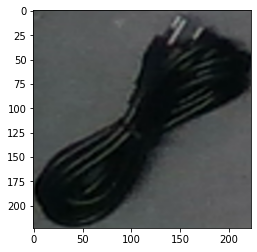

In [42]:
from matplotlib import pylab

pylab.imshow(df['X'][100])

In [43]:
import tensorflow as tf
import keras

In [44]:
model = tf.keras.applications.EfficientNetB7(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax")